# Zeeshan Ali
# 01-134212-197

## TASK 01

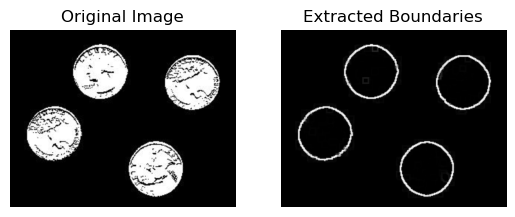

In [35]:
# Write a function named ‘myMorphology’ to extract the boundaries of coins from the read image.

import cv2
import numpy as np
import matplotlib.pyplot as plt

def myMorphology(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    kernel = np.ones((7,7), np.uint8)
    closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    erosion = cv2.erode(closing, kernel, iterations=1)
    difference = cv2.subtract(closing, erosion)
    
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap = "gray")
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(difference, cmap = "gray")
    plt.title('Extracted Boundaries')
    plt.axis('off')
    
img = cv2.imread("image.png")
myMorphology(img)

## TASK 02

(-0.5, 204.5, 244.5, -0.5)

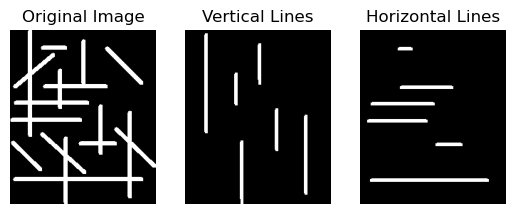

In [36]:
# Use the opening operator to separate horizontal and vertical lines from the read image.

img = cv2.imread("image1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel1 = np.ones((11,2), np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel1)
vertical = cv2.erode(opening, kernel1, iterations=1)

kernel2 = np.ones((2,16), np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel2)
horizontal = cv2.erode(opening, kernel2, iterations=1)

plt.subplot(1, 3, 1)
plt.imshow(img, cmap = "gray")
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(vertical, cmap = "gray")
plt.title('Vertical Lines')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(horizontal, cmap = "gray")
plt.title('Horizontal Lines')
plt.axis('off')

# TASK 03

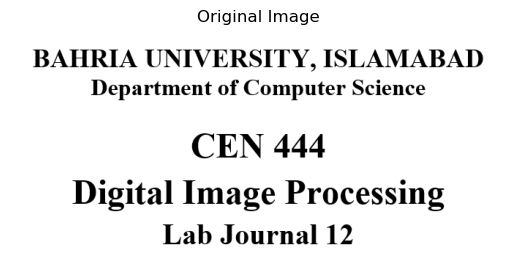

Approximate number of lines:  6
Approximate number of words:  18


In [37]:
# Find the approximate number of lines and words in the given image.

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("Image2.png", cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Find the number of lines
# Create a horizontal structuring element for dilation
kernel_line = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 1))  # Larger horizontal size to group lines
dilated_lines = cv2.dilate(binary_image, kernel_line, iterations=1)
# Apply connected component analysis
num_labels_lines, _, _, _ = cv2.connectedComponentsWithStats(dilated_lines, connectivity=8)

# Find the number of words
# Create a smaller horizontal structuring element for dilation
kernel_word = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 1))  # Smaller horizontal size to group words
dilated_words = cv2.dilate(binary_image, kernel_word, iterations=1)
# Apply connected component analysis
num_labels_words, _, _, _ = cv2.connectedComponentsWithStats(dilated_words, connectivity=8)

# The actual counts are reduced by 1 since the background is also labeled
num_lines = num_labels_lines - 1
num_words = num_labels_words - 1

original_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')
plt.show()
print("Approximate number of lines: ", num_lines)
print("Approximate number of words: ", num_words)

# TASK 04

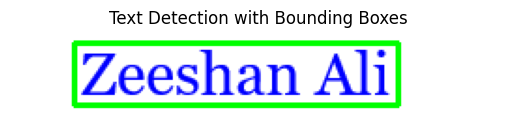

In [2]:
# Detect the text in the image and make a bounding box around it is using morphological operations.

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("zee.png")
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(grayscale, 127, 255, cv2.THRESH_BINARY_INV)

# Apply dilation to merge text components
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
dilated = cv2.dilate(binary_image, kernel, iterations=1)

# Find contours to detect text regions
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around detected text
output_image = image.copy()
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green bounding box

output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
plt.imshow(output_image)
plt.title("Text Detection with Bounding Boxes")
plt.axis('off')
plt.show()